## Aim:
Implement decision tree on crop dataset

- based on ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall' ]
<br>
- predict the 'label'

## Theory
- decision trees are a nnparametric supervised earning method used for classification and regression
- mdel learns simple decision rules inferred from the data features
- tree is piecewise constant approximation
## 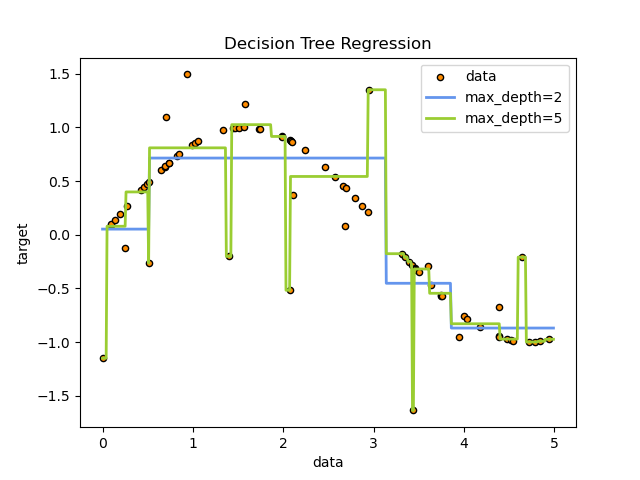

- scikit learn uses an optimized version of CART algorithm
- doesn't support categorical variables

## Mathematics:


time complexity:
<br>
run time cost to construct a balanced binary tree:
$O(n_{samples}n_{features}log(n_{samples}))$

query time: $O(log(n_{samples}))$

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Code
! pip install scikit-learn

In [3]:
## import libraries
from sklearn import tree
from sklearn.inspection import DecisionBoundaryDisplay
import pandas as pd
import numpy as np

In [5]:
## dataset - crop_recommendation_dirty.csv
df=pd.read_csv('data/Crop_recommendation_dirty.csv')

In [6]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,rice
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,rice
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248,rice
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034,rice
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df["label_encoded"]=0

In [4]:
df.shape

(2310, 9)

In [5]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label,label_encoded
2305,40.0,64.0,16.0,16.433403,24.240459,5.926677,140.371781,kidneybeans,0
2306,100.0,10.0,53.0,24.543570,84.608083,6.211749,42.006603,watermelon,0
2307,117.0,82.0,45.0,25.293915,79.291222,5.614471,105.422025,banana,0
2308,24.0,63.0,19.0,19.347944,55.968055,4.681576,194.592115,pigeonpeas,0
2309,16.0,51.0,21.0,31.019636,49.976752,3.532009,32.812965,mothbeans,0


In [6]:

temp= pd.DataFrame(df['label'])


label      
blackgram      108
maize          108
orange         108
muskmelon      107
pigeonpeas     107
coconut        107
papaya         106
lentil         106
mothbeans      106
apple          106
rice           106
mungbean       105
chickpea       104
kidneybeans    104
watermelon     104
jute           104
pomegranate    104
mango          103
coffee         102
banana         102
cotton         102
grapes         101
Name: count, dtype: int64

In [11]:
df.tail(100)

,N,P,K,temperature,humidity,ph,rainfall,label,label_encoded
2210,44.0,75.0,22.0,30.032840,64.148005,7.574562,71.210069,blackgram,0
2211,0.0,19.0,31.0,25.517913,94.384206,6.271953,178.729772,coconut,5
2212,16.0,15.0,42.0,19.678321,89.089357,6.890784,108.546863,pomegranate,16
2213,70.0,38.0,35.0,24.397362,79.268617,7.014064,164.269701,jute,15
2214,25.0,12.0,26.0,28.569735,95.679067,6.436314,134.837035,coconut,5
...,...,...,...,...,...,...,...,...,...
2305,40.0,64.0,16.0,16.433403,24.240459,5.926677,140.371781,kidneybeans,13
2306,100.0,10.0,53.0,24.543570,84.608083,6.211749,42.006603,watermelon,14
2307,117.0,82.0,45.0,25.293915,79.291222,5.614471,105.422025,banana,19
2308,24.0,63.0,19.0,19.347944,55.968055,4.681576,194.592115,pigeonpeas,4


In [8]:
temp.value_counts()

label      
blackgram      108
maize          108
orange         108
muskmelon      107
pigeonpeas     107
coconut        107
papaya         106
lentil         106
mothbeans      106
apple          106
rice           106
mungbean       105
chickpea       104
kidneybeans    104
watermelon     104
jute           104
pomegranate    104
mango          103
coffee         102
banana         102
cotton         102
grapes         101
Name: count, dtype: int64

In [13]:
def encode():
    for item in range(0,2310):
        if df['label'][item]=='blackgram':
            df['label_encoded'][item]=0
        if df['label'][item]=='maize':
            df['label_encoded'][item]=1
        if df['label'][item]=='orange':
            df['label_encoded'][item]=2
        if df['label'][item]=='muskmelon':
            df['label_encoded'][item]=3
        if df['label'][item]=='pigeonpeas':
            df['label_encoded'][item]=4
        if df['label'][item]=='coconut':
            df['label_encoded'][item]=5
        if df['label'][item]=='papaya':
            df['label_encoded'][item]=6
        if df['label'][item]=='lentil':
            df['label_encoded'][item]=7
        if df['label'][item]=='mothbeans':
            df['label_encoded'][item]=8
        if df['label'][item]=='apple':
            df['label_encoded'][item]=9
        if df['label'][item]=='rice':
            df['label_encoded'][item]=10
        if df['label'][item]=='mungbean':
            df['label_encoded'][item]=11
        if df['label'][item]=='chickpea':
            df['label_encoded'][item]=12
        if df['label'][item]=='kidneybeans':
            df['label_encoded'][item]=13
        if df['label'][item]=='watermelon':
            df['label_encoded'][item]=14
        if df['label'][item]=='jute':
            df['label_encoded'][item]=15
        if df['label'][item]=='pomegranate':
            df['label_encoded'][item]=16
        if df['label'][item]=='mango':
            df['label_encoded'][item]=17
        if df['label'][item]=='coffee':
            df['label_encoded'][item]=18
        if df['label'][item]=='banana':
            df['label_encoded'][item]=19
        if df['label'][item]=='cotton':
            df['label_encoded'][item]=20
        if df['label'][item]=='grapes':
            df['label_encoded'][item]=21
    

In [18]:
y=df['label_encoded']

In [19]:
y

0       10
1       10
2       10
3       10
4       10
        ..
2305    13
2306    14
2307    19
2308     4
2309     8
Name: label_encoded, Length: 2310, dtype: int64

In [20]:
X1 = df.drop(['label','label_encoded'], axis=1)
X2 = df.drop(['label','rainfall','label_encoded'], axis=1)
X3 = df.drop(['label','rainfall','ph','label_encoded'], axis=1)
X4 = df.drop(['label','rainfall','ph','humidity','label_encoded'], axis=1)
X5 = df.drop(['label','rainfall','ph','humidity','K','label_encoded'], axis=1)
X6 = df.drop(['label','rainfall','ph','humidity','K','P','label_encoded'], axis=1)


In [21]:
X1

,N,P,K,temperature,humidity,ph,rainfall
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2305,40.0,64.0,16.0,16.433403,24.240459,5.926677,140.371781
2306,100.0,10.0,53.0,24.543570,84.608083,6.211749,42.006603
2307,117.0,82.0,45.0,25.293915,79.291222,5.614471,105.422025
2308,24.0,63.0,19.0,19.347944,55.968055,4.681576,194.592115


In [31]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [19]:
# tree.DecisionTreeClassifier?

In [16]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test=train_test_split(X1,y,test_size=0.33,random_state=42)

In [23]:

# X=[[0,0],[1,1],[2,2],[2,3],[3,2],[2,3],[0,0]]
# y_true=[0,1,0,1,0,1,1]
clf=tree.DecisionTreeClassifier()
clf=clf.fit(X_train,y_train)


In [24]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,label_encoded
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,rice,10
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,rice,10
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248,rice,10
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034,rice,10
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,rice,10


In [28]:
y_pred = clf.predict(X_test)

In [31]:
y_pred.shape

(763,)

In [32]:
X_test.shape

(763, 7)

[Text(0.5861482688848921, 0.96875, 'x[2] <= 140.0\ngini = 0.954\nsamples = 100.0%\nvalue = [0.052, 0.048, 0.047, 0.046, 0.041, 0.042, 0.052, 0.045\n0.045, 0.049, 0.045, 0.045, 0.039, 0.043, 0.045, 0.045\n0.048, 0.047, 0.047, 0.043, 0.044, 0.043]'),
 Text(0.353951214028777, 0.90625, 'x[6] <= 30.02\ngini = 0.95\nsamples = 90.8%\nvalue = [0.057, 0.053, 0.051, 0.051, 0.045, 0.046, 0.058, 0.05\n0.05, 0.001, 0.05, 0.049, 0.043, 0.048, 0.049, 0.049\n0.053, 0.052, 0.051, 0.047, 0.048, 0.001]'),
 Text(0.47004974145683454, 0.9375, 'True  '),
 Text(0.2443794964028777, 0.84375, 'x[2] <= 45.5\ngini = 0.029\nsamples = 4.5%\nvalue = [0.0, 0.0, 0.0, 0.986, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0\n0.0, 0.014, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0\n0.0, 0.0]'),
 Text(0.22999100719424462, 0.78125, 'x[4] <= 92.818\ngini = 0.198\nsamples = 0.6%\nvalue = [0.0, 0.0, 0.0, 0.889, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0\n0.0, 0.111, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0\n0.0, 0.0]'),
 Text(0.2156025179856115, 0.71875, 'gini = 0.0\

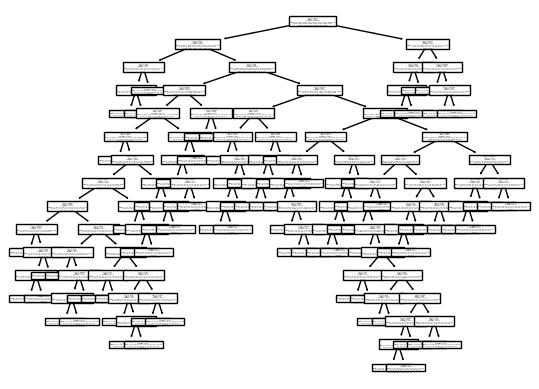

In [33]:
tree.plot_tree(clf, proportion=True)

In [22]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold
values = clf.tree_.value

In [23]:
n_nodes

3

In [20]:
# clf?

## Result


In [ ]:
# precision recall

In [34]:
# confusion matrix

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [40]:
accuracy_score(y_test,y_pred)

0.8676277850589778

In [36]:
a=confusion_matrix(y_test, y_pred)

In [37]:
a.shape

(22, 22)

## Learning outcome
- we used decision tree on crop data

## Note: 
- scikit-learn uses an optimized version of the CART algorithm; however, the scikit-learn implementation does not support categorical variables for now.

## References
- https://en.wikipedia.org/wiki/Decision_tree_learning